In [1]:
#importing required library
import pandas as pd
import numpy as np

In [2]:
#imorting the required csv file
movies=pd.read_csv("movies recomendation.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [3]:
ratings=pd.read_csv("ratings recomendation.csv")
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
#droping the unnecessary feature
ratings.drop("timestamp",1,inplace=True)
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [8]:
import matplotlib.pyplot as plt
import wordcloud

In [9]:
#working of wordcloud is to see the most used or frequently used words in the movie name.
#This may be a importrant factor to suggest the recomended movie
from wordcloud import WordCloud,STOPWORDS

In [10]:
movies["title"].head()

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
Name: title, dtype: object

In [11]:
movies["title"].isnull().sum()


0

In [12]:
title_corpus=" ".join(movies["title"])

In [13]:
title_corpus

'Toy Story (1995) Jumanji (1995) Grumpier Old Men (1995) Waiting to Exhale (1995) Father of the Bride Part II (1995) Heat (1995) Sabrina (1995) Tom and Huck (1995) Sudden Death (1995) GoldenEye (1995) American President, The (1995) Dracula: Dead and Loving It (1995) Balto (1995) Nixon (1995) Cutthroat Island (1995) Casino (1995) Sense and Sensibility (1995) Four Rooms (1995) Ace Ventura: When Nature Calls (1995) Money Train (1995) Get Shorty (1995) Copycat (1995) Assassins (1995) Powder (1995) Leaving Las Vegas (1995) Othello (1995) Now and Then (1995) Persuasion (1995) City of Lost Children, The (Cité des enfants perdus, La) (1995) Shanghai Triad (Yao a yao yao dao waipo qiao) (1995) Dangerous Minds (1995) Twelve Monkeys (a.k.a. 12 Monkeys) (1995) Babe (1995) Dead Man Walking (1995) It Takes Two (1995) Clueless (1995) Cry, the Beloved Country (1995) Richard III (1995) Dead Presidents (1995) Restoration (1995) Mortal Kombat (1995) To Die For (1995) How to Make an American Quilt (1995) 

In [14]:
title_wordcloud=WordCloud(stopwords=STOPWORDS,background_color="black",height=2000,width=4000).generate(title_corpus)

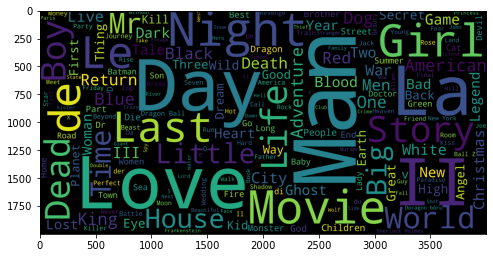

In [15]:
plt.figure(figsize=(8,8)) 
plt.imshow(title_wordcloud)
plt.show()

In [16]:
ratings["rating"].describe() # we can see the mean rating is 3.5 i.e maximum people has given approx 3.5 as rating

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

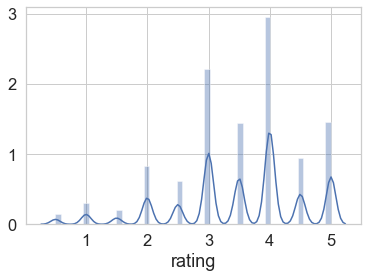

In [17]:
import seaborn as sns
sns.set(style="whitegrid",font_scale=1.5) # change the font_scale and see the changes
sns.distplot(ratings['rating'])


In [19]:
df=pd.merge(movies,ratings,on="movieId")

In [20]:
df

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5
...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5
100833,193585,Flint (2017),Drama,184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5


In [21]:
df.isnull().sum()

movieId    0
title      0
genres     0
userId     0
rating     0
dtype: int64

In [22]:
movie_rating_count=(df.groupby("title")["rating"].count())

In [23]:
movie_rating_count

title
'71 (2014)                                    1
'Hellboy': The Seeds of Creation (2004)       1
'Round Midnight (1986)                        2
'Salem's Lot (2004)                           1
'Til There Was You (1997)                     2
                                             ..
eXistenZ (1999)                              22
xXx (2002)                                   24
xXx: State of the Union (2005)                5
¡Three Amigos! (1986)                        26
À nous la liberté (Freedom for Us) (1931)     1
Name: rating, Length: 9719, dtype: int64

In [24]:
total_ratings_count=movie_rating_count.reset_index()

In [25]:
total_ratings_count

,title,rating
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2
...,...,...
9714,eXistenZ (1999),22
9715,xXx (2002),24
9716,xXx: State of the Union (2005),5
9717,¡Three Amigos! (1986),26


In [26]:
total_ratings_count.rename(columns={"rating":"totalratingscount"},inplace=True)

In [27]:
total_ratings_count

,title,totalratingscount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2
...,...,...
9714,eXistenZ (1999),22
9715,xXx (2002),24
9716,xXx: State of the Union (2005),5
9717,¡Three Amigos! (1986),26


In [28]:
rating_with_totalratingscount=df.merge(total_ratings_count,on="title")

In [29]:
rating_with_totalratingscount

,movieId,title,genres,userId,rating,totalratingscount
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,215
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,215
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1
100833,193585,Flint (2017),Drama,184,3.5,1
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1


In [30]:
rating_with_totalratingscount["totalratingscount"].describe()

count    100836.000000
mean         58.758777
std          61.965384
min           1.000000
25%          13.000000
50%          39.000000
75%          84.000000
max         329.000000
Name: totalratingscount, dtype: float64

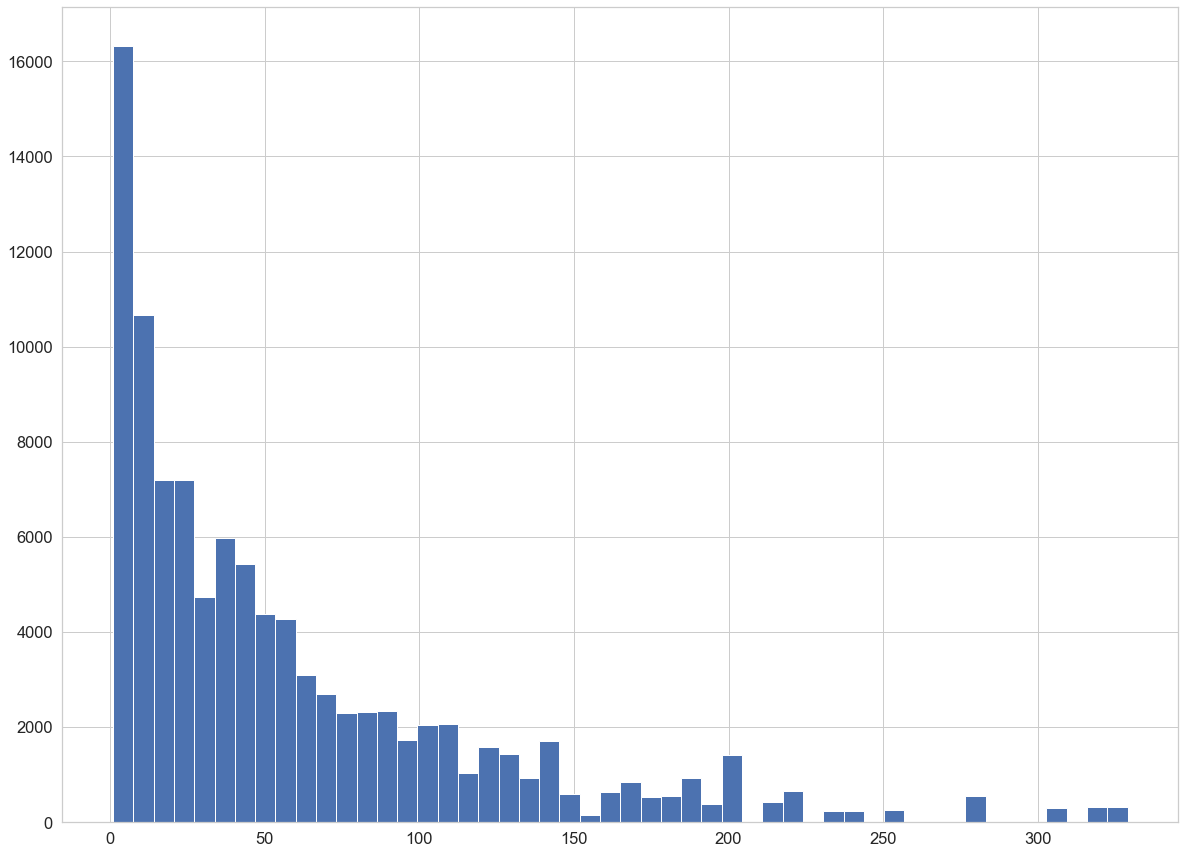

In [31]:
rating_with_totalratingscount["totalratingscount"].hist(figsize=(20,15),bins=50)

In [32]:
threshold_totalratings=50
popular_movies=rating_with_totalratingscount.query("totalratingscount>=@threshold_totalratings")
popular_movies.tail()

,movieId,title,genres,userId,rating,totalratingscount
98313,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,561,2.0,54
98314,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,586,4.0,54
98315,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,596,4.0,54
98316,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,599,3.5,54
98317,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,610,3.0,54


In [33]:
popular_movies.shape

(41362, 6)

In [34]:
#creat a pivot table
pivot_table=popular_movies.pivot_table(index="title",columns="userId",values="rating").fillna(0)
pivot_table

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,5.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X2: X-Men United (2003),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0
You've Got Mail (1998),0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0
Young Frankenstein (1974),5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0


In [35]:
from scipy.sparse import csr_matrix # to convert the pivot table to array matrix
pivot_matrix=csr_matrix(pivot_table.values)
pivot_matrix


<450x606 sparse matrix of type '<class 'numpy.float64'>'
	with 41360 stored elements in Compressed Sparse Row format>

In [36]:
from sklearn.neighbors import NearestNeighbors

In [37]:
Knn_model=NearestNeighbors(metric="cosine",algorithm="brute") # here it is unsupervised machine learning
Knn_model.fit(pivot_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [38]:
pivot_table.shape

(450, 606)

In [40]:
query_index=np.random.choice(pivot_table.shape[0]) # to pick up one record ( one movie record) from the pivot table we use shape[0]
query_index

129

the upper no is the movie id of any randomly picked up record

In [41]:
pivot_table.iloc[query_index,:]

userId
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
606    0.0
607    0.0
608    0.0
609    0.0
610    4.5
Name: District 9 (2009), Length: 606, dtype: float64

In [42]:
pivot_table.iloc[query_index,:].values

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 3.5, 0. , 0. , 3.5, 0. , 0. , 3.5, 0.5, 0. , 4. , 0. , 0. ,
       0. , 4.5, 4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 4. , 0. , 0. , 5. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 4. , 0. , 0. , 0. , 0. , 3.5, 0. , 0. , 0. , 0. , 0. , 0. ,
       4.5, 0. , 0. , 3.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 4. ,
       0. , 0. , 0. , 0. , 0. , 0. , 3.5, 0. , 0. , 0. , 0. , 0. , 0. ,
       4.5, 0. , 0. , 0. , 0. , 0. , 4. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 2.5, 0. , 0. , 0. , 0. , 0. , 0.

In [43]:
distance,indices=Knn_model.kneighbors(pivot_table.iloc[query_index, :].values.reshape(1,-1),n_neighbors=6) # Knn_model.kneighbors
# is used to find out the neighbour movies of our selected movie.n_neighbors=6 means we want 6 similar movies of our selected movie
print(distance,indices)


[[0.         0.38683821 0.38800147 0.43185592 0.43560709 0.45579215]] [[129 377  36 220 448 116]]


 the below code will generate the recomended movies on the basis of  the selected movie.

In [44]:
for i in range(0,len(distance.flatten())):
    if i==0:
        print("recomendation for the movie :",pivot_table.index[query_index])
    else:
        print(str(i) + ":"+str(pivot_table.index[indices.flatten()[i]])+"   with distance  "+str(distance.flatten()[i]))

recomendation for the movie District 9 (2009)
1:Star Trek (2009)   with distance  0.3868382103165914
2:Avatar (2009)   with distance  0.38800147272775876
3:Iron Man (2008)   with distance  0.431855921605815
4:Zombieland (2009)   with distance  0.4356070907851546
5:Dark Knight, The (2008)   with distance  0.4557921540448918
